# Import Libraries & Read Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

file_name = '/kaggle/input/temperature-and-ice-cream-sales/Ice Cream Sales - temperatures.csv'
df = pd.read_csv(file_name)

In [2]:
df.head() # read data

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        365 non-null    int64  
 1   Ice Cream Profits  365 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.8 KB


In the column of the data to be analyzed, There is no missing value and not a mixed data format.

In [4]:
round(df.describe(),2)

,Temperature,Ice Cream Profits
count,365.00,365.00
mean,71.98,52.10
std,13.26,15.99
min,39.00,11.88
25%,63.00,40.65
50%,73.00,53.62
75%,82.00,63.63
max,101.00,89.29


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Temperature', ylabel='Ice Cream Profits'>

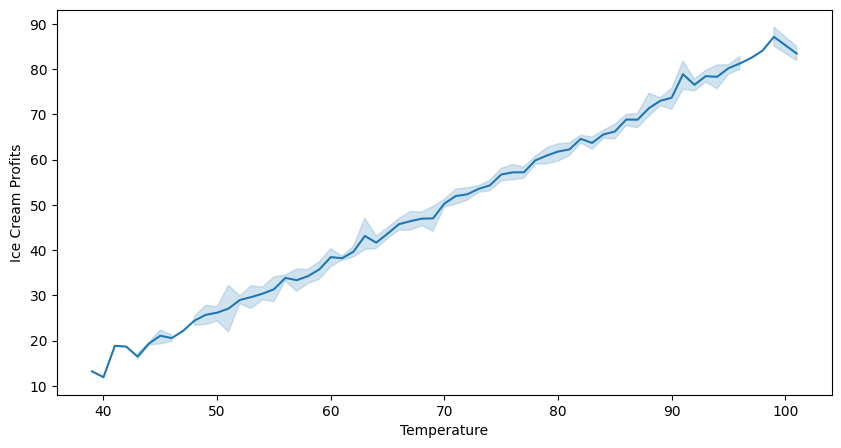

In [5]:
plt.figure(figsize=(10,5)) 
sns.lineplot(x='Temperature', y='Ice Cream Profits', data=df)

Compare to a y = x graph with the same starting point. (y = x -25.83 graph to be exact)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


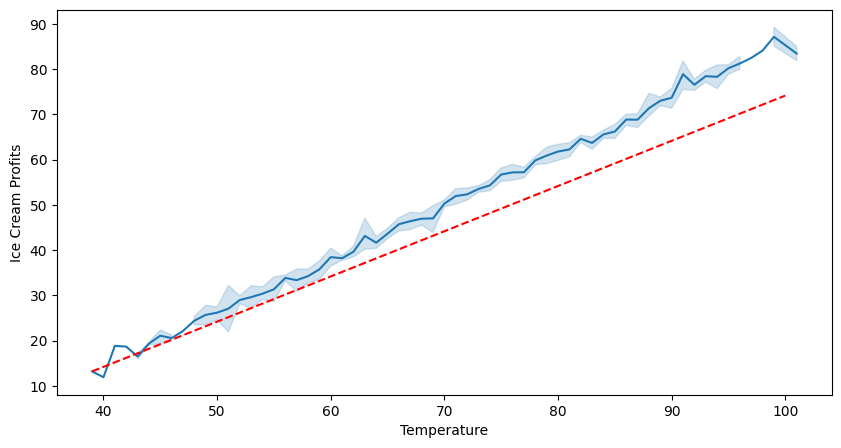

In [6]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Temperature', y='Ice Cream Profits')

x = np.linspace(39, 100, 100)
y = x - (39 - 13.17)

plt.plot(x, y, color='red', linestyle='--')

plt.show()

Overall, you can see that there are no outliers.

# pre-processing operation

Since there are no missing values, outliers and not mixed data, I will not do preprocessing other than dividing the training set and the test set.

In [7]:
X = df.drop('Ice Cream Profits',axis=1) 
y = df['Ice Cream Profits']             
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=100) 

# Modeling : Linear regression

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
predict_value = model.predict(X_test)

# Evaluating a Model

In [9]:
# Compare Actual and Predicted Values

data = pd.DataFrame({'Actual':y_test,'Predict_value':predict_value})
data

,Actual,Predict_value
147,48.77,48.566310
125,45.26,46.190047
314,69.66,68.764548
56,36.79,35.496862
241,59.70,60.447626
...,...,...
136,41.68,47.378178
191,50.64,54.506968
360,85.13,84.210259
3,18.65,16.486756


<Axes: xlabel='Actual', ylabel='Predict_value'>

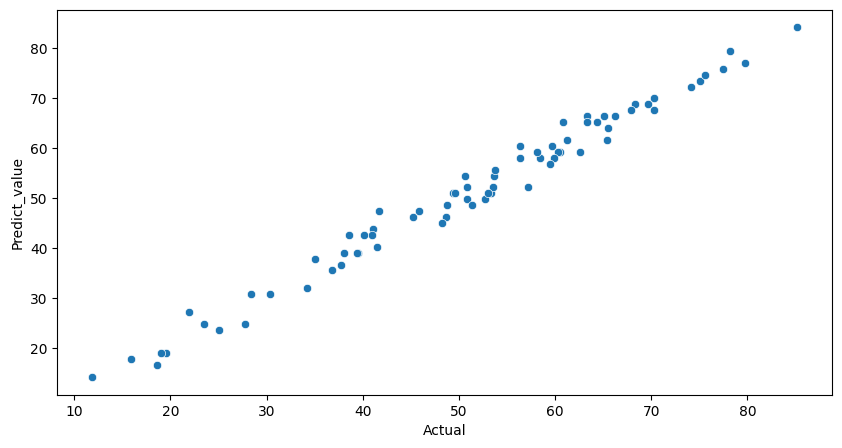

In [10]:
# Scatter plot

plt.figure(figsize=(10,5))
sns.scatterplot(x='Actual', y='Predict_value', data= data)

The appropriateness of the model depends on how closely the points align with the y = x graph.

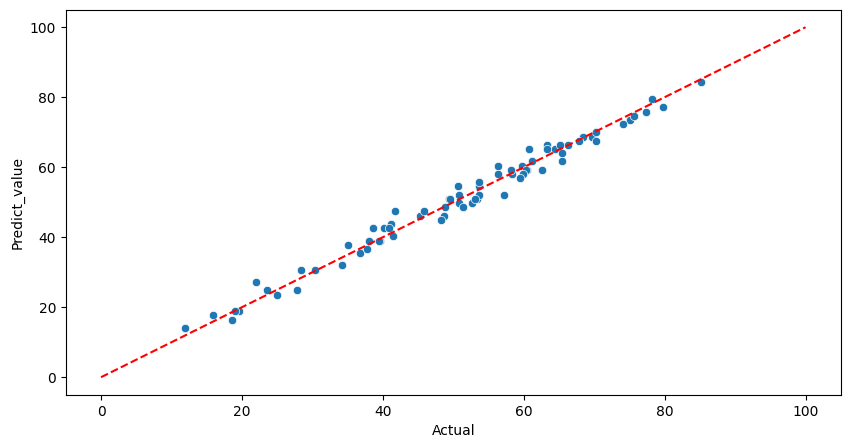

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Actual', y='Predict_value', data= data)
x = np.linspace(0, 100, 100)
y = x 
plt.plot(x, y, color='red', linestyle='--')

In [12]:
# RMSE
# It is calculated by rooting the MSE with the root mean square error. 
# Closer to zero is the better model, but it is relative, not absolute.

mean_squared_error(y_test, predict_value)**0.5

2.2442450805337675

In [13]:
# R2
# Closer to 1 is the better model

model.score(X_train,y_train)

0.975455794766843

# Correlation Analysis

In [14]:
pd.Series(model.coef_,index=X.columns)

Temperature    1.188132
dtype: float64

The model allows us to determine the correlation.

The coefficient is 1.188132, indicating that for every 1 unit increase in 'Temperature', 'Ice Cream Profits' increase by 1.188132 units.

In [15]:
# y-intercept value
model.intercept_

-33.414773286607954

Finally, the function of the linear regression analysis is as follows.

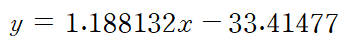